# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [37]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [38]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [39]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [40]:
# Create a Beautiful Soup Object
soup = BeautifulSoup(browser.html, 'html.parser')
soup

NoSuchWindowException: Message: no such window: target window already closed
from unknown error: web view not found
  (Session info: chrome=114.0.5735.198)
Stacktrace:
0   chromedriver                        0x000000010f50e6b8 chromedriver + 4937400
1   chromedriver                        0x000000010f505b73 chromedriver + 4901747
2   chromedriver                        0x000000010f0c3616 chromedriver + 435734
3   chromedriver                        0x000000010f09858c chromedriver + 259468
4   chromedriver                        0x000000010f13064f chromedriver + 882255
5   chromedriver                        0x000000010f145516 chromedriver + 967958
6   chromedriver                        0x000000010f12ade3 chromedriver + 859619
7   chromedriver                        0x000000010f0f8d7f chromedriver + 654719
8   chromedriver                        0x000000010f0fa0de chromedriver + 659678
9   chromedriver                        0x000000010f4ca2ad chromedriver + 4657837
10  chromedriver                        0x000000010f4cf130 chromedriver + 4677936
11  chromedriver                        0x000000010f4d5def chromedriver + 4705775
12  chromedriver                        0x000000010f4d005a chromedriver + 4681818
13  chromedriver                        0x000000010f4a292c chromedriver + 4495660
14  chromedriver                        0x000000010f4ed838 chromedriver + 4802616
15  chromedriver                        0x000000010f4ed9b7 chromedriver + 4802999
16  chromedriver                        0x000000010f4fe99f chromedriver + 4872607
17  libsystem_pthread.dylib             0x00007fff204028fc _pthread_start + 224
18  libsystem_pthread.dylib             0x00007fff203fe443 thread_start + 15


In [ ]:
# Extract all rows of data
soup.find_all('tr', class_ ="data-row")

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [ ]:
# Use list comprehension to extract each row as a list, collecting the table into a list of rows
data = [[cell.text for cell in row.find_all('td')] for row in soup.find_all('tr', class_ ="data-row")]
data

In [ ]:
# Extract the table header names
headers = [header.text for header in soup.find('tr').find_all('th')]
headers

In [ ]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
df = pd.DataFrame(data, columns = headers)

In [41]:
# Confirm DataFrame was created successfully
df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [42]:
# Examine data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1867 non-null   object        
 1   terrestrial_date  1867 non-null   datetime64[ns]
 2   sol               1867 non-null   int64         
 3   ls                1867 non-null   int64         
 4   month             1867 non-null   int64         
 5   min_temp          1867 non-null   float64       
 6   pressure          1867 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(1)
memory usage: 102.2+ KB


In [43]:
# Change data types for data analysis
df = df.astype(
    {
        'id': 'object',
        'terrestrial_date':'datetime64[ns]',
        'sol':'int64',
        'ls':'int64',
        'month':'int64',
        'min_temp':'float64',
        'pressure':'float64'
    }
)

In [44]:
# Confirm type changes were successful by examining data types again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1867 non-null   object        
 1   terrestrial_date  1867 non-null   datetime64[ns]
 2   sol               1867 non-null   int64         
 3   ls                1867 non-null   int64         
 4   month             1867 non-null   int64         
 5   min_temp          1867 non-null   float64       
 6   pressure          1867 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(1)
memory usage: 102.2+ KB


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [45]:
# 1. How many months are there on Mars?
df['month'].value_counts().sort_values()

10    112
9     134
11    138
8     141
7     142
6     147
5     149
12    166
1     174
2     178
3     192
4     194
Name: month, dtype: int64

In [46]:
# 2. How many Martian days' worth of data are there?
len(df['sol'].unique())

1867

In [48]:
# 3. What is the average low temperature by month?
average_min_by_mon = df[['month','min_temp']].groupby(df['month']).mean()
average_min_by_mon

,month,min_temp
month,,
1,1.0,-77.160920
2,2.0,-79.932584
3,3.0,-83.307292
4,4.0,-82.747423
5,5.0,-79.308725
6,6.0,-75.299320
7,7.0,-72.281690
8,8.0,-68.382979
9,9.0,-69.171642


Text(0.5, 1.0, 'Average Min Temperature for Each Month')

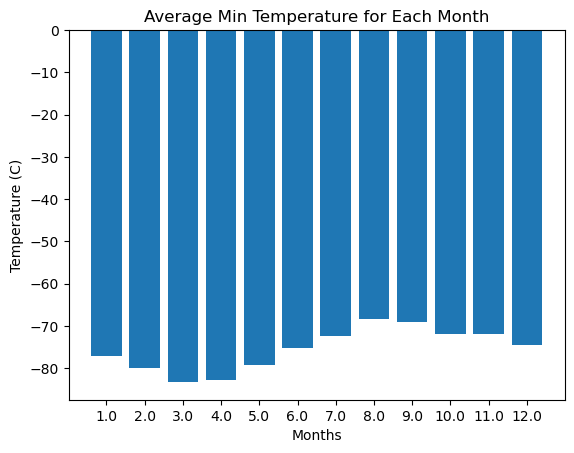

In [49]:
# Plot the average temperature by month
plt.bar(average_min_by_mon['month'],average_min_by_mon['min_temp'])

plt.ylabel('Temperature (C)')
plt.xlabel('Months')

plt.xticks(range(1, 13),average_min_by_mon['month'])

plt.title('Average Min Temperature for Each Month')

In [66]:
# Identify the coldest and hottest months in Curiosity's location
## Coldest
avg_min_mon_sorted = average_min_by_mon.sort_values('min_temp')
avg_min_mon_sorted = avg_min_mon_sorted.reset_index(drop=True)

cold_mon = avg_min_mon_sorted['month'][0]
cold_temp = avg_min_mon_sorted['min_temp'][0]

print(f'The coldest month is {cold_mon}, where it is {cold_temp} degrees.')

## Warmest
avg_min_mon_sorted = average_min_by_mon.sort_values('min_temp',ascending=False)
avg_min_mon_sorted = avg_min_mon_sorted.reset_index(drop=True)

warm_mon = avg_min_mon_sorted['month'][0]
warm_temp = avg_min_mon_sorted['min_temp'][0]

print(f'The warmest month is {warm_mon}, where it is {warm_temp} degrees.')

The coldest month is 3.0, where it is -83.30729166666667 degrees.
The warmest month is 8.0, where it is -68.38297872340425 degrees.


In [85]:
# 4. Average pressure by Martian month
average_press_by_mon = df['pressure'].groupby(df['month']).mean()
press_mon_df = average_press_by_mon.to_frame()
press_mon_df = press_mon_df.sort_values('pressure')
press_mon_df

,pressure
month,
6,745.054422
5,748.557047
7,795.105634
4,806.329897
12,842.156627
11,857.014493
1,862.488506
8,873.829787
3,877.322917


Text(0.5, 1.0, 'Average Daily Pressure for Each Month')

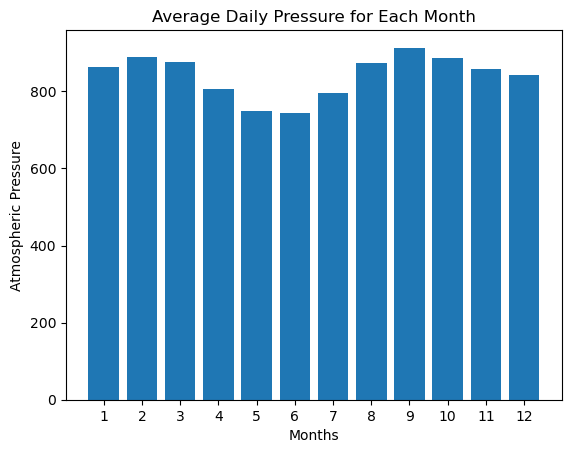

In [87]:
# Plot the average pressure by month
plt.bar(press_mon_df.index, press_mon_df['pressure'])

plt.ylabel('Atmospheric Pressure')
plt.xlabel('Months')

plt.xticks(press_mon_df.index)

plt.title('Average Daily Pressure for Each Month')

Text(0.5, 1.0, 'Min Temperature for Each Day')

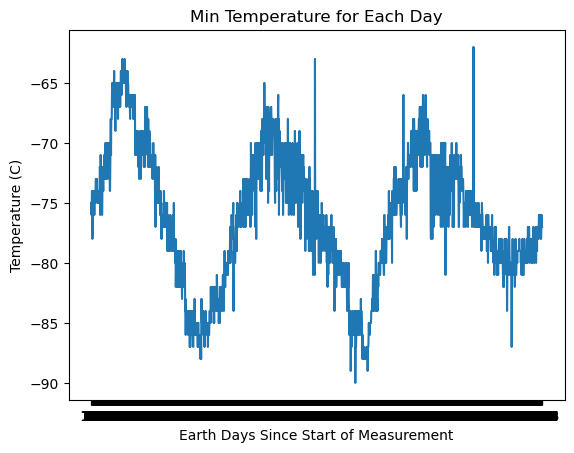

In [90]:
# 5. How many terrestrial (earth) days are there in a Martian year?
# Plot the average temperature by month
plt.plot(df['id'],df['min_temp'])

plt.ylabel('Temperature (C)')
plt.xlabel('Earth Days Since Start of Measurement')

plt.title('Min Temperature for Each Day')

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [20]:
# Write the data to a CSV
df.to_csv('')

In [21]:
browser.quit()